
__Program__           - ipl_cricket_data_analysis.ipynb <br>
__Author__            - Aditi Kharche <br>
__Program Date__      - March 2 2023 <br>
__Business Problem__  - <br>
> Indian Premier League (Cricket) Data Needs to be analyzed to understand patterns and positioning of matches, utilization of venues etc <br>

__Change log__        - Initial Version created. Ready for review - March 22 2022


## LIBRARY IMPORT SECTION <br> 

In [13]:
#Import Libraries required for data analysis and data visualization 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import os
import calendar
import sqlite3
from subprocess import check_output

## DATA LOADING SECTION <br>


In [14]:
#Defining Connection string

conn = sqlite3.connect('./Data/database.sqlite')
exectue = conn.cursor()

In [15]:
#test query to test connection and ability to connect to database

pd.read_sql_query('SELECT * FROM Ball_by_Ball limit 10', conn)

,Match_Id,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,Bowler
0,335987,1,1,1,1,2,1,1,2,14
1,335987,1,1,2,2,1,1,6,7,106
2,335987,1,2,1,1,2,2,2,1,14
3,335987,1,2,2,2,1,2,7,6,106
4,335987,1,3,1,1,2,2,2,1,14
5,335987,1,3,2,2,1,2,7,6,106
6,335987,1,4,1,1,2,2,2,1,14
7,335987,1,4,2,2,1,2,7,6,106
8,335987,1,5,1,1,2,2,2,1,14
9,335987,1,5,2,2,1,1,6,7,106


In [16]:
#Unit test - Checking the count by pandas and SQL to ensure that it matches.

#Counting number of rows in table using panda
df_var1 = pd.read_sql_query('SELECT * FROM Ball_by_Ball', conn)
df_var1.shape

(136590, 10)

In [17]:
#Counting number of rows in table using SQL

pd.read_sql_query('SELECT count(*) FROM Ball_by_Ball', conn)

,count(*)
0,136590


## DATA TRANSFORMATION SECTION <br>


In [18]:
# Drop the table if exists. We are going to create this table from scratch hence dropping if exists
# This step may throw error if table does not exists

conn.execute(
    """DROP TABLE LOCATION"""
       )

In [19]:
# Create Location table by combining Country, City, Venue table
# This step/table will help us avoid more joins to be done in next step.

conn.execute(
    """CREATE TABLE LOCATION 
AS
SELECT CT.country_id, CT.Country_Name, 
C.city_id, C.City_Name, 
V.Venue_Id, V.Venue_Name
FROM 
Country CT 
LEFT JOIN City C
ON (CT.Country_Id = C.Country_id)
LEFT JOIN Venue V 
ON (C.City_Id = V.City_Id)
WHERE V.city_id IS NOT NULL"""
       )

In [20]:
# Checking the output to ensure that it is per expectations

pd.read_sql_query('SELECT * FROM LOCATION LIMIT 5', conn)

,Country_Id,Country_Name,City_Id,City_Name,Venue_Id,Venue_Name
0,1,India,17,Ahmedabad,19,"Sardar Patel Stadium, Motera"
1,1,India,1,Bangalore,1,M Chinnaswamy Stadium
2,1,India,2,Chandigarh,33,"Punjab Cricket Association IS Bindra Stadium, ..."
3,1,India,2,Chandigarh,2,"Punjab Cricket Association Stadium, Mohali"
4,1,India,8,Chennai,8,"MA Chidambaram Stadium, Chepauk"


In [21]:
# Storing the output of SQL query in dataframe

df_location = pd.read_sql_query('SELECT * FROM LOCATION', conn)

In [10]:
#Querying gthe dataframe and compare 

df_location.head(5)

,Country_Id,Country_Name,City_Id,City_Name,Venue_Id,Venue_Name
0,1,India,17,Ahmedabad,19,"Sardar Patel Stadium, Motera"
1,1,India,1,Bangalore,1,M Chinnaswamy Stadium
2,1,India,2,Chandigarh,33,"Punjab Cricket Association IS Bindra Stadium, ..."
3,1,India,2,Chandigarh,2,"Punjab Cricket Association Stadium, Mohali"
4,1,India,8,Chennai,8,"MA Chidambaram Stadium, Chepauk"


In [11]:
# Drop the table if exists. We are going to create this table from scratch hence dropping if exists
# This step may throw error if table does not exists

conn.execute(
    """DROP TABLE SEASONAL_METRICS_BY_LOCATION"""
       )

In [12]:
# Create SEASONAL_METRICS_BY_LOCATION table by joining multiple table. 
# This table helps in putting names towards id columns and adds more column which are easy to understand
# This step/table will help us avoid more joins to be done in next step.

conn.execute("""
CREATE TABLE SEASONAL_METRICS_BY_LOCATION
AS
select 
S.season_year,
L.country_name,
L.city_name,
L.Venue_Name,
M.Match_Id,
O.Outcome_type,
T.team_name AS TEAM1_NAME,
TW.team_name AS TEAM2_NAME,
TP.Team_Name AS TOSS_WINNER_TEAM_NAME,
TL.Team_Name AS MATCH_WINNER_TEAM_NAME,
TS.toss_name,
w.win_type
FROM Match M
LEFT JOIN Season S 
ON (M.season_id = S.Season_Id)
LEFT JOIN LOCATION L
ON (M.venue_id = L.Venue_Id)
LEFT JOIN Outcome O
ON (M.outcome_TYPE = O.Outcome_Id)
LEFT JOIN TEAM T
ON (M.Team_1 = T.Team_Id)
LEFT JOIN TEAM TW
ON (M.Team_2 = TW.Team_Id)
LEFT JOIN TEAM TP
ON (M.toss_winner = TP.Team_Id)
LEFT JOIN TEAM TL
ON (M.match_winner = TL.Team_Id)
LEFT JOIN Win_By W
ON (M.win_TYPE = W.Win_Id)
LEFT JOIN Toss_Decision TS
ON (M.toss_decide = TS.Toss_Id)""")

In [13]:
# Checking the output to ensure that it is per expectations

pd.read_sql_query('SELECT * FROM SEASONAL_METRICS_BY_LOCATION LIMIT 5', conn)

,Season_Year,Country_Name,City_Name,Venue_Name,Match_Id,Outcome_Type,TEAM1_NAME,TEAM2_NAME,TOSS_WINNER_TEAM_NAME,MATCH_WINNER_TEAM_NAME,Toss_Name,Win_Type
0,2008,India,Bangalore,M Chinnaswamy Stadium,335987,Result,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs
1,2008,India,Chandigarh,"Punjab Cricket Association Stadium, Mohali",335988,Result,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings,bat,runs
2,2008,India,Delhi,Feroz Shah Kotla,335989,Result,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,Delhi Daredevils,bat,wickets
3,2008,India,Mumbai,Wankhede Stadium,335990,Result,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,bat,wickets
4,2008,India,Kolkata,Eden Gardens,335991,Result,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,Kolkata Knight Riders,bat,wickets


In [14]:
# Storing the output of SQL query in dataframe

df_flat_table = pd.read_sql_query('SELECT * FROM SEASONAL_METRICS_BY_LOCATION', conn)

In [15]:
#Querying gthe dataframe and compare 

df_flat_table.head(5)

,Season_Year,Country_Name,City_Name,Venue_Name,Match_Id,Outcome_Type,TEAM1_NAME,TEAM2_NAME,TOSS_WINNER_TEAM_NAME,MATCH_WINNER_TEAM_NAME,Toss_Name,Win_Type
0,2008,India,Bangalore,M Chinnaswamy Stadium,335987,Result,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs
1,2008,India,Chandigarh,"Punjab Cricket Association Stadium, Mohali",335988,Result,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings,bat,runs
2,2008,India,Delhi,Feroz Shah Kotla,335989,Result,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,Delhi Daredevils,bat,wickets
3,2008,India,Mumbai,Wankhede Stadium,335990,Result,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,bat,wickets
4,2008,India,Kolkata,Eden Gardens,335991,Result,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,Kolkata Knight Riders,bat,wickets



## DATA GROUPING AND VISUALIZATION SECTION <br>


### Insight 1 - Total number of IPL Matches by Season  <br>

In [16]:
# Calculate Total number of IPL Matches by Season

df_agg_qry1 = pd.read_sql_query("""SELECT 
S.Season_Year, COUNT(match_id) AS NUMBER_OF_MATCHES, COUNT(DISTINCT team1_name)  NUMBER_OF_TEAMS
FROM SEASONAL_METRICS_BY_LOCATION S
GROUP BY S.Season_Year""", conn)




In [17]:
#Test Code

df_agg_qry1.head(5)

,Season_Year,NUMBER_OF_MATCHES,NUMBER_OF_TEAMS
0,2008,58,8
1,2009,57,7
2,2010,60,8
3,2011,73,10
4,2012,74,9


<AxesSubplot:xlabel='Season_Year', ylabel='NUMBER_OF_MATCHES'>

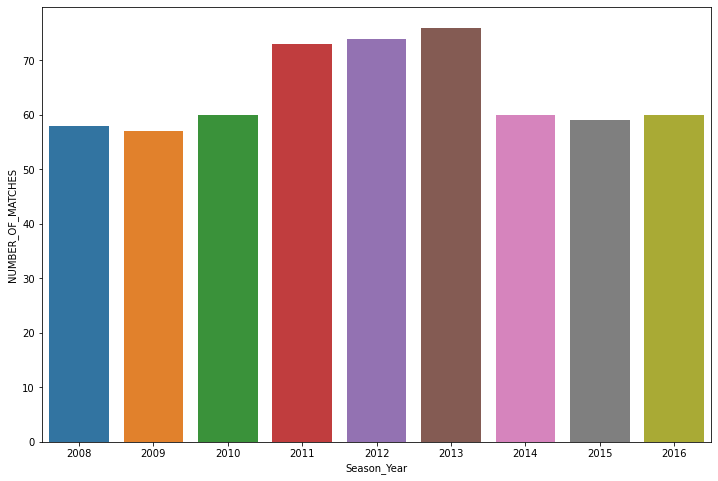

In [18]:
# Plot the chart 

plt.figure(figsize=(12,8))
sns.barplot(x='Season_Year',y='NUMBER_OF_MATCHES' ,data=df_agg_qry1)

### Conclusion from Insight 1  <br>
> Number of Matches went up from 2009 till 2013 and it went down <br>
> Reason - Number of teams going up and down impact the number of matches played <br>

### Insight 2 - Total number of IPL Matches by Venue  <br>

In [19]:
# Total number of IPL Matches by Venue 

df_agg_qry2 = pd.read_sql_query("""SELECT 
venue_name, count(match_id) number_of_matches_played
FROM SEASONAL_METRICS_BY_LOCATION S
group by venue_name order by 2 desc""", conn)



In [20]:
#Test Code

df_agg_qry2.head(5)

,Venue_Name,number_of_matches_played
0,M Chinnaswamy Stadium,58
1,Eden Gardens,54
2,Feroz Shah Kotla,53
3,Wankhede Stadium,49
4,"MA Chidambaram Stadium, Chepauk",48


<AxesSubplot:xlabel='number_of_matches_played', ylabel='Venue_Name'>

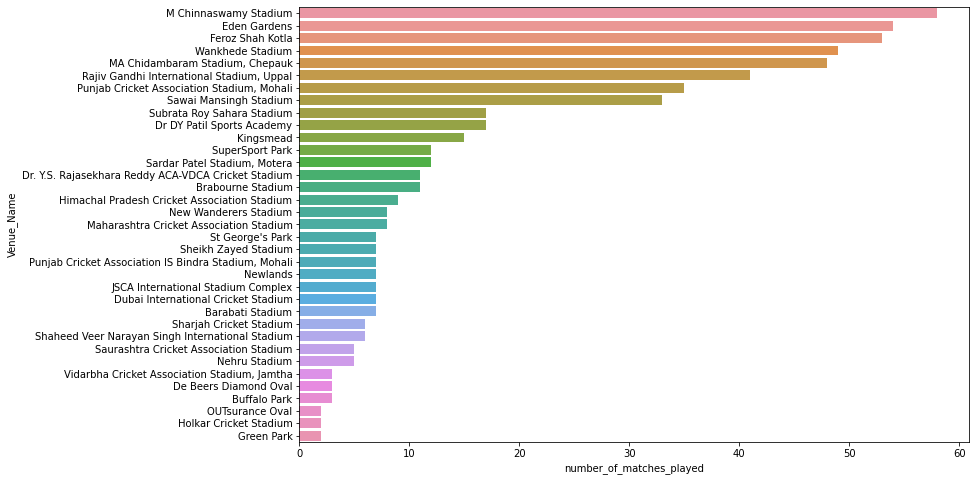

In [21]:
# Plot the chart 

plt.figure(figsize=(12,8))
sns.barplot(x='number_of_matches_played',y='Venue_Name' ,data=df_agg_qry2)

### Conclusion from Insight 2  <br>
> Chinnaswammy Stadium is most favorite to play more number of matches followed by Eden Garden <br>

### Insight 3 - Total number of IPL Matches Played by a Team  <br>

In [22]:
# Calculate Total number of IPL Matches Played by a Team

df_agg_qry3 = pd.read_sql_query("""select team_name, sum(number_of_matches) as number_of_matches
FROM
(
SELECT 
 team1_name  as team_name,  count(team1_name) as number_of_matches
FROM SEASONAL_METRICS_BY_LOCATION S
group by team1_name
union all 
SELECT 
 team2_name as team_name,  count(team2_name) as number_of_matches
FROM SEASONAL_METRICS_BY_LOCATION S
group by team2_name
)
group by team_name
order by 2 desc""", conn)

In [23]:
#Test Code

df_agg_qry3.head(5)

,team_name,number_of_matches
0,Mumbai Indians,140
1,Royal Challengers Bangalore,139
2,Kings XI Punjab,134
3,Delhi Daredevils,133
4,Kolkata Knight Riders,132


<AxesSubplot:xlabel='number_of_matches', ylabel='team_name'>

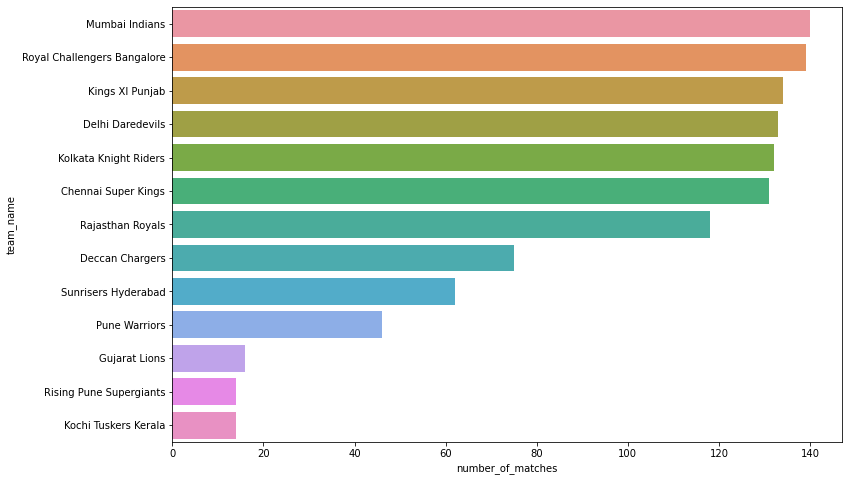

In [24]:
# Plot the chart 

plt.figure(figsize=(12,8))
sns.barplot(x='number_of_matches',y='team_name' ,data=df_agg_qry3)

### Conclusion from Insight 3  <br>
> Mumbai Indians and Royal Challengers are teams which have played most season and most matches <br>
> Some teams were added only for some seasons and were dropped hence their number of matches are lower <br>

### Insight 4 - Analyze Percentage Factor of Winning a Match If you win the Toss   <br>

In [25]:
# Calculate Percentage Factor of Winning a Match If you win the Toss

df_agg_qry4 = pd.read_sql_query("""SELECT venue_name, WIN_STATS*100/NUMBER_OF_MATCHES as PERCENT_TOSS_TO_WIN
FROM(
select venue_name, count(match_id) NUMBER_OF_MATCHES, sum(toss_and_win_ratio) as WIN_STATS
from
(
SELECT s.*,
case when toss_winner_team_name = match_winner_team_name then 1 else 0 end as toss_and_win_ratio
FROM  SEASONAL_METRICS_BY_LOCATION S
)
group by venue_name
  )
  ORDER BY 2 DESC""", conn)



In [26]:
#Test Code

df_agg_qry4.head(5)

,venue_name,PERCENT_TOSS_TO_WIN
0,Green Park,100
1,Holkar Cricket Stadium,100
2,OUTsurance Oval,100
3,Barabati Stadium,71
4,Sheikh Zayed Stadium,71


<AxesSubplot:xlabel='PERCENT_TOSS_TO_WIN', ylabel='venue_name'>

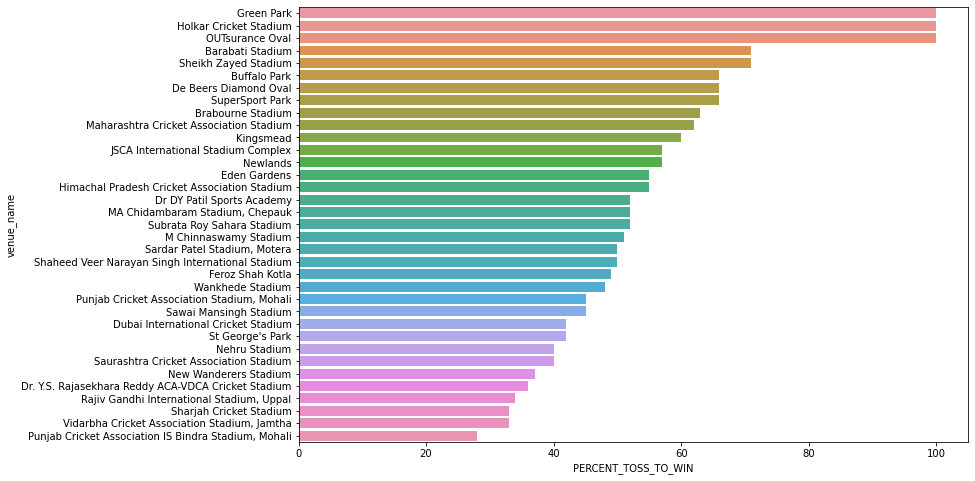

In [27]:
# Plot the chart 

plt.figure(figsize=(12,8))
sns.barplot(x='PERCENT_TOSS_TO_WIN',y='venue_name' ,data=df_agg_qry4)

### Conclusion from Insight 4  <br>
> Green park, Holkar and OUTsurance Oval are the Venues were team winning the toss has always won the match <br>

### Insight 5 - HeatMap of Number of Matches Played in each City   <br>

In [28]:
# Calculate the number of Matches Played in each City

df_agg_qry5 = pd.read_sql_query("""select season_year, city_name, match_id from SEASONAL_METRICS_BY_LOCATION""", conn)

In [29]:
#Test Code

df_agg_qry5.head(5)

,Season_Year,City_Name,Match_Id
0,2008,Bangalore,335987
1,2008,Chandigarh,335988
2,2008,Delhi,335989
3,2008,Mumbai,335990
4,2008,Kolkata,335991


In [30]:
# Create a pivot table and store the output in dataframe

pt=df_agg_qry5.pivot_table(index='City_Name',columns='Season_Year', values='Match_Id', aggfunc ='count')

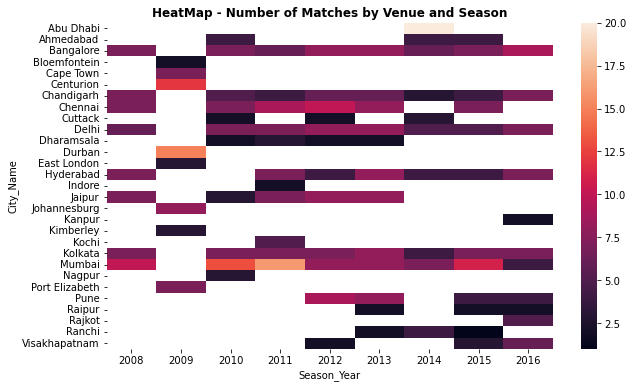

In [31]:
#Show the headmap on the of pivot

plt.figure(figsize = (10, 6))
sns.heatmap(pt)
plt.yticks(rotation = 0)
plt.title("HeatMap - Number of Matches by Venue and Season", fontsize=12, fontweight='bold')
plt.show()

### Conclusion from Insight 5  <br>
> HeatMap shows that Some cities like Mumbai, Kolkata have consistently hosted more matches each season <br>
> 2009 season was help outside of India and Durban was more common venue <br>

### Insight 6 - HeatMap of Number of Sixes Hit by a team in each Over   <br>

In [32]:
# Calculate Number of Sixes Hit by a team in each Over

df_agg_qry7 = pd.read_sql_query("""
SELECT s.season_year, C.Player_Name ,a.match_id, b.over_id, A.team_batting, pm.Player_Id, pm.Team_Id, tm.Team_Name, count(*) as number_of_sixes
	                        FROM Ball_by_Ball A
		                        INNER JOIN Batsman_Scored B
			                        ON A.Match_Id = b.match_id and A.Over_Id = b.over_id and  A.Ball_Id = b.Ball_Id 
                                    and  A.Innings_No = b.Innings_No
                                INNER JOIN SEASONAL_METRICS_BY_LOCATION S
                                ON B.match_id = S.match_id
		                        INNER JOIN Player C
			                         ON A.Striker = C.Player_Id
                                     inner join Player_Match pm
                                     on (c.Player_Id =pm.Player_Id and A.Match_Id = pm.match_id)
                                     inner join  Team tm
                                     on (pm.team_id = tm.Team_Id)
		                    WHERE B.Runs_Scored = 6 and season_year = 2011
                            group by C.Player_Name ,a.match_id, b.over_id, A.team_batting, pm.Player_Id, pm.Team_Id, tm.Team_Name
                            """, conn)

In [33]:
#Test Code

df_agg_qry7.head(5)

,Season_Year,Player_Name,Match_Id,Over_Id,Team_Batting,Player_Id,Team_Id,Team_Name,number_of_sixes
0,2011,A Mishra,501208,20,8,136,8,Deccan Chargers,1
1,2011,A Mithun,501265,16,2,244,2,Royal Challengers Bangalore,1
2,2011,A Symonds,501226,16,7,56,7,Mumbai Indians,1
3,2011,A Symonds,501226,17,7,56,7,Mumbai Indians,1
4,2011,A Symonds,501229,19,7,56,7,Mumbai Indians,1


In [34]:
# Create a pivot table 

df_agg_qry7.pivot_table(index='Over_Id',columns='Team_Name', values='number_of_sixes', aggfunc ='max')

Team_Name,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Royal Challengers Bangalore
Over_Id,,,,,,,,,,
1,NaN,NaN,1.0,NaN,1.0,1.0,1.0,2.0,NaN,1.0
2,1.0,1.0,NaN,2.0,3.0,1.0,NaN,NaN,2.0,2.0
3,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,4.0
4,NaN,1.0,1.0,1.0,2.0,1.0,NaN,1.0,1.0,2.0
5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0
6,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
7,1.0,NaN,NaN,1.0,2.0,NaN,1.0,1.0,1.0,1.0
8,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0
9,1.0,1.0,1.0,2.0,1.0,1.0,NaN,1.0,1.0,1.0


In [35]:
# Create a pivot table and store the output in dataframe

pt2=df_agg_qry7.pivot_table(index='Over_Id',columns='Team_Name', values='number_of_sixes', aggfunc ='max')

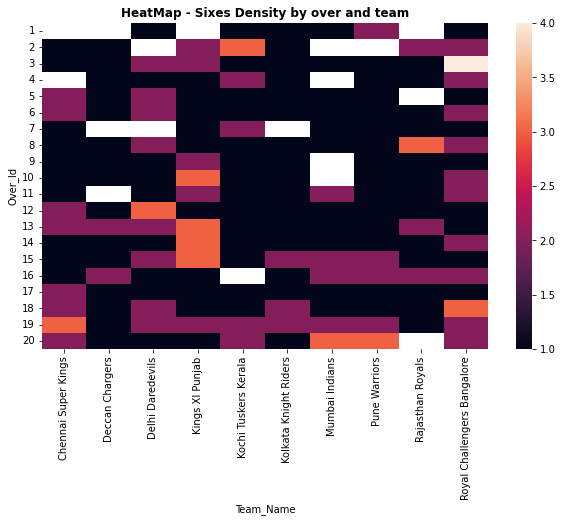

In [36]:

#Show the headmap on the of pivot
plt.figure(figsize = (10, 6))
sns.heatmap(pt2)
plt.yticks(rotation = 0)
plt.title("HeatMap - Sixes Density by over and team", fontsize=12, fontweight='bold')
plt.show()

### Conclusion from Insight 6  <br>
> HeatMap shows that how teams are scoring more runs in last 5 overs by hitting more sixes <br>
> 19th and 20th over is either low or high as teams are trying to score big and may lose wicket <br>